# Module 02: A Box Model Carbon Assignment

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

31. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation


In [1]:
import numpy as np
import matplotlib.pyplot as plt


M1i = 1100.0    #mass in gigatons 
M2i = 300.0     #mass in gigatons

k12 = 0.0003    #K constant for atmoshpere carbon to land carbon
k21 = 0.1       #K constant for land carbon to atmoshpere carbon 

ti = 1751      #time initial
tf = 2008     #time unit in years
dt = 1/365     #time step 

t = np.arange(ti,tf+dt,dt)# starts at intial time(ti), then ends at the final time (tf)+change in time 
                

Nt = (t.size)+1# notes how many steps are being taken   


M1 = np.zeros((Nt,))# Create a container to store the position of the random number at each time step. 
M2 = np.zeros((Nt,))# Note that this corresponds to an array of zeros that is Nt x 1.   
                       

for i in np.arange(Nt):
    if (i==0):  # This is the syntax of a Python 'if' statement. If we're on the first step (i==0), 
                # then there was no previous step, so the position is 0. If (i>0) the previous location
                # was the value of x at step i-1

        M1[i] = M1i # sets inital conditions for M1
        M2[i] = M2i # sets inital conditions for M2
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] #equation for change of carbon in atomosphere
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1] #equation for change of carbon on land 
        
        M1[i] = M1[i-1] + dM1dt*dt #calculates the above equations for each time step
        M2[i] = M2[i-1] + dM2dt*dt #calculates the above equations for each time step
        

print('M1 final = '+str(M1[i])+'') #prints final value for above simulations
print('M2 final = '+str(M2[i])+'')




M1 final = 333.3333333333658
M2 final = 1066.6666666665792


## 2. Assignment Tasks


__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.
 

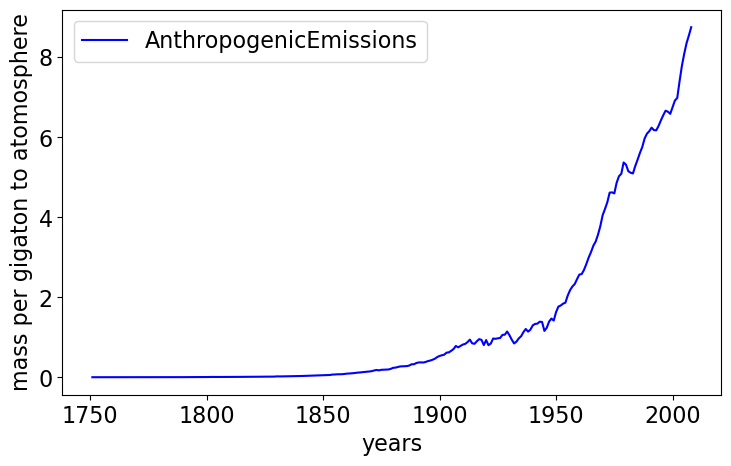

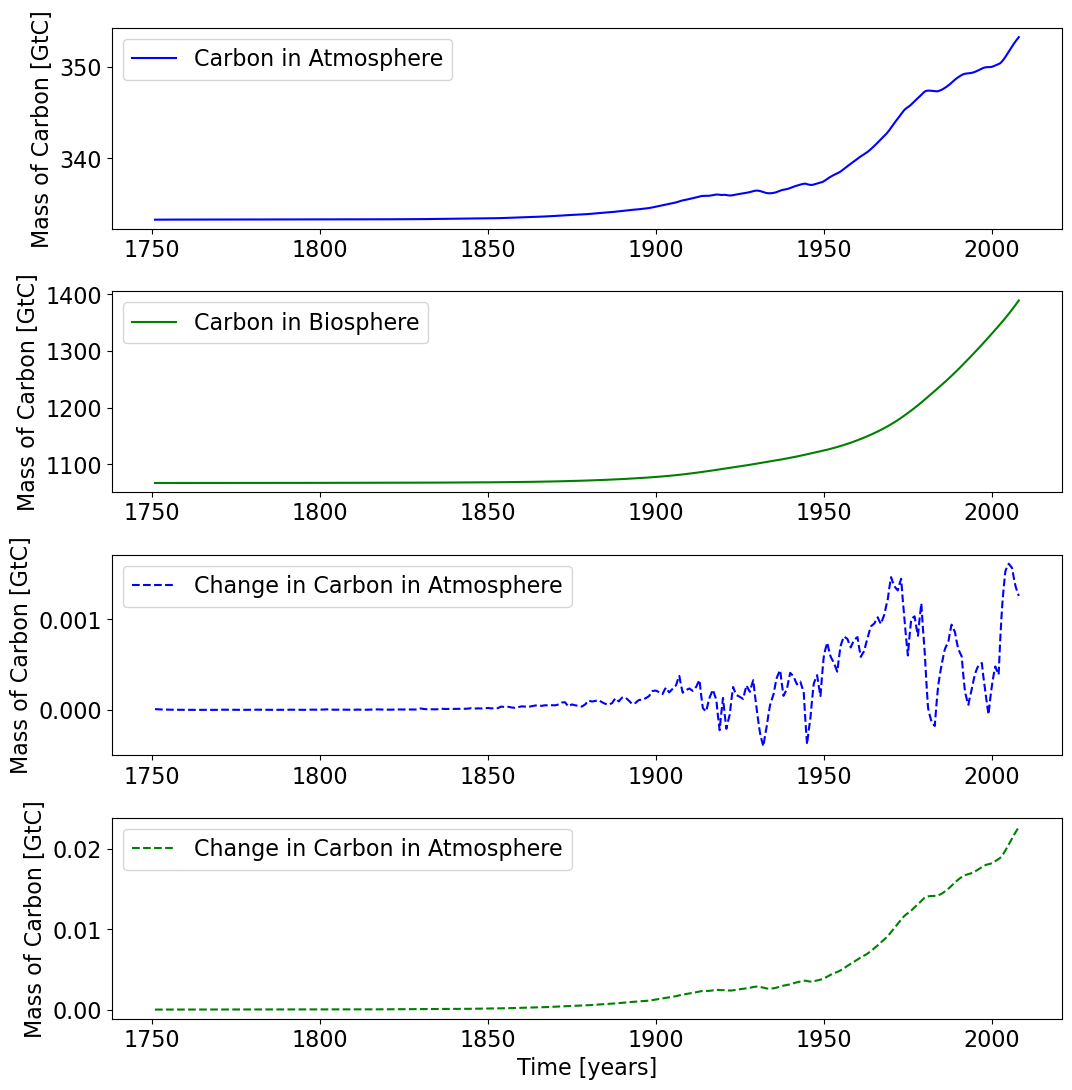

M1 Final = 353.22824788827904 GtC

M2 Final = 1389.1417712620218 GtC


In [2]:
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
#np.loadtxt loads the stated text file and allows for the data to be used
#dlimiter - The string used to separate values
#skiprow - Skip the first skiprows lines, including comments;

year = data[:,0] #calls data from the text file listed above from the zero column
cflux = data[:,1]#calls data from the text file listed above from the first column

# plot equations from above
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})
plt.title('AnthropogenicEmissions')

plt.subplot(2,1,1)
plt.plot(year,cflux,'b', label='AnthropogenicEmissions')
plt.xlabel('years')
plt.ylabel('mass per gigaton to atomosphere')
plt.legend()

plt.show() # shows equations from above 

# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.interp.html
cflux_t = np.interp(t, year, cflux)
#np.interp - interpolates data "year(xp)" and "cflux(fp~y)" at values of time(t)
#Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.
Fa = cflux_t #calls cflux_t as Fa


#below is the same as the equations from part A only that we have added the 
# AnthropogenicEmissions data to the equations for atomosphere
for i in np.arange(Nt):
    if (i==0):  

        M1[i] = M1[-1]  # sets inital conditions into equations from previous final answer
        M2[i] = M2[-1]
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1]+Fa[i-1]  #equation for change of carbon in atomosphere +  AnthropogenicEmissions
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]#equation for change of carbon on land 
        
        M1[i] = M1[i-1] + dM1dt*dt#calculates the above equations for each time step
        M2[i] = M2[i-1] + dM2dt*dt#calculates the above equations for each time step

#np.diff calculates the difference between points in the array, M1[i+1]-M1[i], and outputs that value
dM1 = np.diff(M1)
dM2 = np.diff(M2)

# Reset size of M1 and M2 so they plot correctly against t in plot 1 and 2
M1 = M1[0:i]   # Re-assigns M1 to only include indices from 0 to size of t, aka i-1
               # since the for loop has ended (i will equal the i value at the last run of the for loop)
               # assuming calling elements 0:i of M1 works because python does not include i (like in the np.arange command)
M2 = M2[0:i]   # Re-assigns M2 to only include indices of the array from 0 to size of t


#plots equations from above from time(t) vs varibles M1, M2, dM1, dM2 
plt.figure(figsize = (11,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(4,1,1)
plt.plot(t,M1, 'b-', label='Carbon in Atmosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()
plt.tight_layout()#neat little code that adds space between plots

plt.subplot(4,1,2)
plt.plot(t,M2, 'g-', label='Carbon in Biosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()
plt.tight_layout()#neat little code that adds space between plots

plt.subplot(4,1,3)
plt.plot(t,dM1, 'b--', label='Change in Carbon in Atmosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()
plt.tight_layout()#neat little code that adds space between plots

plt.subplot(4,1,4)
plt.plot(t,dM2, 'g--', label='Change in Carbon in Atmosphere')
plt.xlabel('Time [years]')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()
plt.tight_layout()#neat little code that adds space between plots

plt.show()

print('M1 Final = '+str(M1[i-1])+' GtC\n') #prints final value for above simulations
print('M2 Final = '+str(M2[i-1])+' GtC') 

## 2. Assignment Tasks

For all plots, label all axes and provide units.


__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 


M1_2030 Final = 333.33333333335634 GtC
M2_2030 Final = 1505.214170749825 GtC
M1_2050 Final = 333.3333333333751 GtC
M2_2050 Final = 1593.0441707510918 GtC
M1_zeg Final = 346.6675284594091 GtC
M2_zeg Final = 2200.6104906909054 GtC


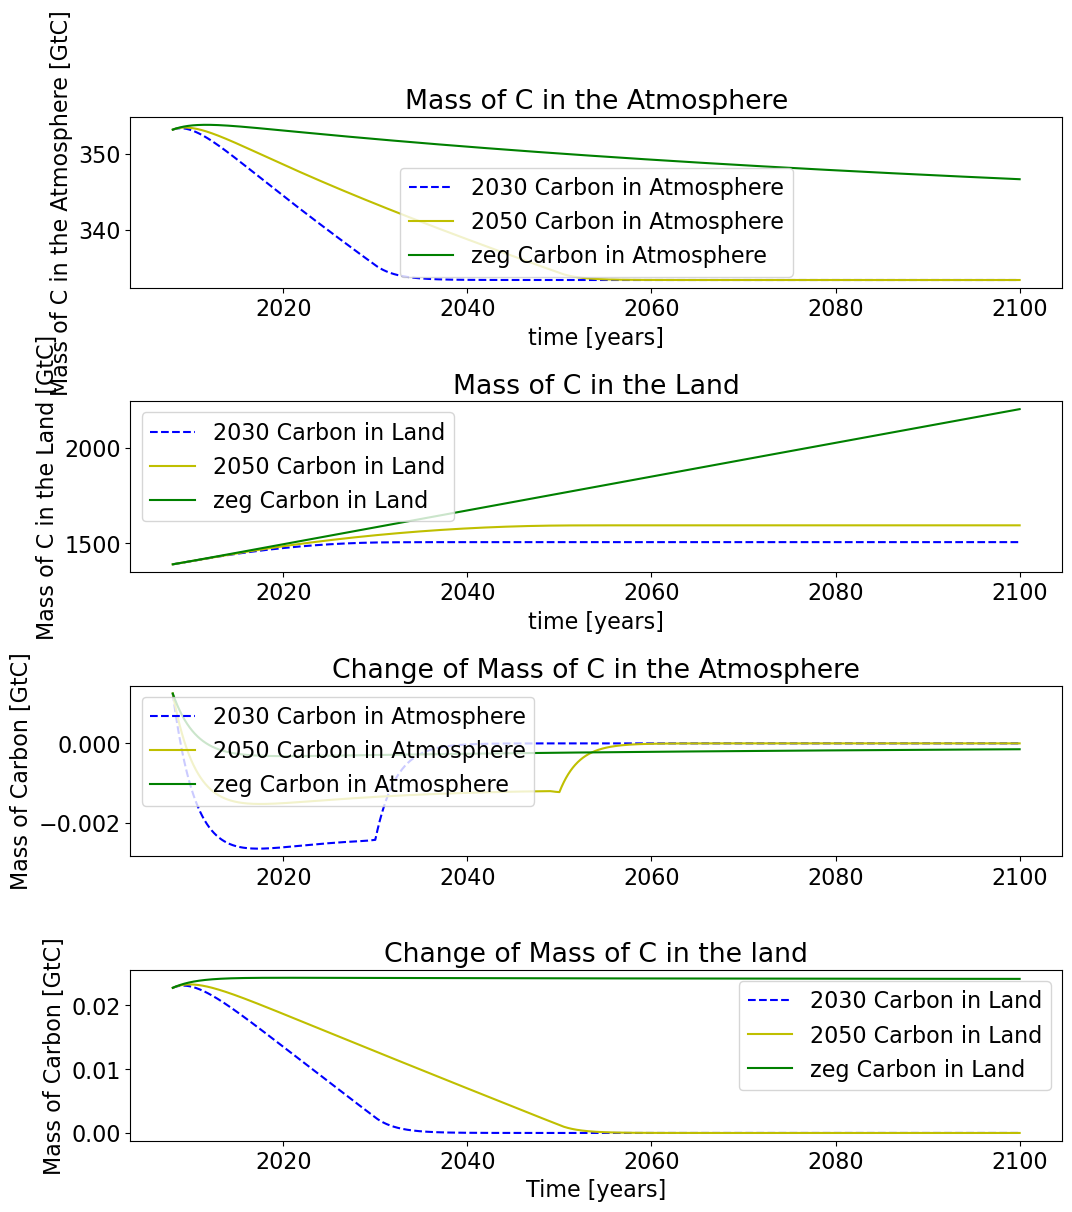

In [3]:
ti_f = 2008    # Initial time (years)
tf_f = 2100   # Final time (years)
dt_f = 1/365  # time step (days)
t_f = np.arange(ti_f,tf_f+dt_f,dt_f)   # creates array from initial to final time + 1 with increment of 1 day
Nt_f = (t_f.size)+1   # calls size of t_f + 1, +1 is needed for diff calculations

future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'#calls txt file 

data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)#loads called txt file
year = data[:,0]#loads data from "zero"column in called txt file
cflux_nz2030 = data[:,1]#loads data from "1st"column in called txt file
cflux_nz2050 = data[:,2]#loads data from "2nd"column in called txt file
cflux_zeg = data[:,3]#loads data from "3rd"column in called txt file

#below is a variation of the 2nd part of part B ran in triplicate. 


# np.interp - interpolates data "(xp~x)" and "(fp~y)" at values of time(t_f)
# Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), 
# evaluated at x.
# below the "x" is year, the "y" is the cflux's, and they are evaluted at "t_f" time 
cflux_2030 = np.interp(t_f, year, cflux_nz2030)
Fa_2030 = cflux_2030

cflux_2050 = np.interp(t_f, year, cflux_nz2050)
Fa_2050 = cflux_2050

cflux_zeg = np.interp(t_f, year, cflux_zeg)
Fa_zeg = cflux_zeg

# Creating containers to store the position of the random number at each time step for each variable. 
M1_2030 = np.zeros((Nt_f,))   
M1_2050 = np.zeros((Nt_f,))   
M1_zeg = np.zeros((Nt_f,))

M2_2030 = np.zeros((Nt_f,))   
M2_2050 = np.zeros((Nt_f,))   
M2_zeg = np.zeros((Nt_f,))


for i in np.arange(Nt_f):
    if (i==0):

        M1_2030[i] = M1[-1]   # sets inital conditions into equations
        M2_2030[i] = M2[-1]   
        
        M1_2050[i] = M1[-1]
        M2_2050[i] = M2[-1]
        
        M1_zeg[i] = M1[-1]
        M2_zeg[i] = M2[-1]

    else:
        # these are the mass balance equations with associated varied emissions data  
        dM1dt_2030 = k21*M2_2030[i-1] - k12*M1_2030[i-1]*M2_2030[i-1]+Fa_2030[i-1]   
        dM2dt_2030 = k12*M1_2030[i-1]*M2_2030[i-1] - k21*M2_2030[i-1]   
        
        dM1dt_2050 = k21*M2_2050[i-1] - k12*M1_2050[i-1]*M2_2050[i-1]+Fa_2050[i-1]   
        dM2dt_2050 = k12*M1_2050[i-1]*M2_2050[i-1] - k21*M2_2050[i-1] 
        
        dM1dt_zeg = k21*M2_zeg[i-1] - k12*M1_zeg[i-1]*M2_zeg[i-1]+Fa_zeg[i-1]   
        dM2dt_zeg = k12*M1_zeg[i-1]*M2_zeg[i-1] - k21*M2_zeg[i-1] 
        
        # Numerical Solutions calculated for each time step
        M1_2030[i] = M1_2030[i-1] + dM1dt_2030*dt_f   
        M2_2030[i] = M2_2030[i-1] + dM2dt_2030*dt_f  
        
        M1_2050[i] = M1_2050[i-1] + dM1dt_2050*dt_f   
        M2_2050[i] = M2_2050[i-1] + dM2dt_2050*dt_f
        
        M1_zeg[i] = M1_zeg[i-1] + dM1dt_zeg*dt_f   
        M2_zeg[i] = M2_zeg[i-1] + dM2dt_zeg*dt_f

# Calculate differences in carbon for plots 3 and 4
dM1_2030 = np.diff(M1_2030)  
dM2_2030 = np.diff(M2_2030) 

dM1_2050 = np.diff(M1_2050)  
dM2_2050 = np.diff(M2_2050)

dM1_zeg = np.diff(M1_zeg)  
dM2_zeg = np.diff(M2_zeg)

# Reset size of M1_**** and M2_**** so they plot correctly against t_f
M1_2030 = M1_2030[0:i]   
M2_2030 = M2_2030[0:i]   

M1_2050 = M1_2050[0:i]   
M2_2050 = M2_2050[0:i]

M1_zeg = M1_zeg[0:i]   
M2_zeg = M2_zeg[0:i]

#printing final values
print('M1_2030 Final = '+str(M1_2030[i-1])+' GtC')  
print('M2_2030 Final = '+str(M2_2030[i-1])+' GtC')  
print('M1_2050 Final = '+str(M1_2050[i-1])+' GtC')  
print('M2_2050 Final = '+str(M2_2050[i-1])+' GtC')
print('M1_zeg Final = '+str(M1_zeg[i-1])+' GtC')  
print('M2_zeg Final = '+str(M2_zeg[i-1])+' GtC') 

#plots, there are 3 scenarios ploted on each plot, 
plt.figure(figsize = (11,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(4,1,1)
plt.title('Mass of C in the Atmosphere')
plt.plot(t_f,M1_2030, 'b--', label='2030 Carbon in Atmosphere')
plt.plot(t_f,M1_2050, 'y-', label='2050 Carbon in Atmosphere')
plt.plot(t_f,M1_zeg, 'g-', label='zeg Carbon in Atmosphere')
plt.ylabel('Mass of C in the Atmosphere [GtC]')
plt.xlabel('time [years]')
plt.legend()
plt.tight_layout()

plt.subplot(4,1,2)
plt.title('Mass of C in the Land')
plt.plot(t_f,M2_2030, 'b--', label='2030 Carbon in Land')
plt.plot(t_f,M2_2050, 'y-', label='2050 Carbon in Land')
plt.plot(t_f,M2_zeg, 'g-', label='zeg Carbon in Land')
plt.ylabel('Mass of C in the Land [GtC]')
plt.xlabel('time [years]')
plt.legend()
plt.tight_layout()

plt.subplot(4,1,3)
plt.title('Change of Mass of C in the Atmosphere')
plt.plot(t_f,dM1_2030, 'b--', label='2030 Carbon in Atmosphere')
plt.plot(t_f,dM1_2050, 'y-', label='2050 Carbon in Atmosphere')
plt.plot(t_f,dM1_zeg, 'g-', label='zeg Carbon in Atmosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()
plt.tight_layout()

plt.subplot(4,1,4)
plt.title('Change of Mass of C in the land')
plt.plot(t_f,dM2_2030, 'b--', label='2030 Carbon in Land')
plt.plot(t_f,dM2_2050, 'y-', label='2050 Carbon in Land')
plt.plot(t_f,dM2_zeg, 'g-', label='zeg Carbon in Land')
plt.xlabel('Time [years]')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()

plt.show()
